In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

$\newcommand{\vec}[1]{{\mathbf{\boldsymbol{{#1}}}}}$

## Numerical solution to Lane-Emden equation.

### 1. Isothermal sphere in hydrostatic equilibrium.

* momentum equation: $\quad \rho \frac{d\vec{v}}{dt} + \vec{\nabla}P + \rho \vec{\nabla} \Phi = 0 \quad \longrightarrow \quad \frac{1}{\rho} \vec{\nabla}P = -\vec{\nabla} \Phi \quad$ (in hydrostatic equilibrium).
* gradient in spherical coordinates: $\quad \vec{\nabla} = \left( \frac{\partial}{\partial r} \vec{\hat{r}} + \frac{1}{r} \frac{\partial}{\partial \theta} \vec{\hat{\theta}} + \frac{1}{r \sin \theta} \frac{\partial}{\partial \phi} \vec{\hat{\phi}} \right) = \frac{d}{dr} \vec{\hat{r}} \quad$ (by spherical symmetry).
* isothermal sphere: $\quad P = c_s^2 \rho \quad \longrightarrow \quad \frac{1}{\rho} \frac{dP}{dr} = \frac{c_s^2}{\rho} \frac{d\rho}{dr} = c_s^2 \frac{d \ln \rho}{dr}$.
* hydrostatic equilibrium for isothermal sphere: $\quad \frac{1}{\rho} \vec{\nabla}P = -\vec{\nabla} \Phi \quad \longrightarrow \quad c_s^2 \frac{d \ln \rho}{dr} = -\frac{d\Phi}{dr}$.
* Poisson equation with spherical symmetry: $\quad \vec{\nabla}^2 \Phi = 4 \pi G \rho \quad \longrightarrow \quad \frac{1}{r^2} \frac{d}{dr} \left( r^2 \frac{d\Phi}{dr} \right) = 4 \pi G \rho$.  

### 2. Lane-Emden equation.
Let $\xi = (\sqrt{4 \pi G \rho_c}/c_s) r$ be the dimensionless radial parameter, and let $\psi = -\ln(\rho/\rho_c)$ be the scaled gravitational potential,
$$ c_s^2 \frac{d \ln \rho}{dr} = -\frac{d\Phi}{dr} \quad \longrightarrow \quad c_s^2 \int_0^r \frac{d \ln \rho}{dr} = - \int_0^r \frac{d\Phi}{dr} \quad \longrightarrow \quad \Phi(r) = -c_s^2 \ln \left(\frac{\rho}{\rho_c} \right) \quad \longrightarrow \quad \psi(\xi) = \frac{\Phi(r)}{c_s^2}, $$
where $\rho_c$ is the central density. Using the new variable $\xi$ in place of $r$,
$$ \frac{d}{dr} = \frac{\sqrt{4 \pi G \rho_c}}{c_s} \frac{d}{d\xi} \quad \text{and} \quad \frac{d}{dr}\left( r^2 \frac{d }{dr} \right) = \frac{\sqrt{4 \pi G \rho_c}}{c_s} \frac{d}{d\xi}\left( \frac{c_s^2}{4 \pi G \rho_c} \frac{\sqrt{4 \pi G \rho_c}}{c_s} \xi^2 \frac{d}{d\xi} \right) = \frac{d}{d\xi} \left( \xi^2 \frac{d}{d\xi} \right). $$
The Poisson equation becomes the Lane-Emden equation:
$$ -\frac{c_s^2}{4 \pi G \rho_c} \bigg[ \frac{1}{r^2} \frac{d}{dr} \ln \left( \frac{\rho}{\rho_c} \right) \bigg] = \frac{\rho}{\rho_c} \quad \longrightarrow \quad \frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\psi}{d\xi} \right)= e^{-\psi}. $$

### 3. Numerical solution for $\psi(x)$.
Write the second-order ODE in terms of two coupled ODEs.
$$ \frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\psi}{d\xi} \right)= e^{-\psi} \quad \longrightarrow \quad \frac{d\psi}{d\xi} = \frac{y}{\xi^2}, \quad \frac{dy}{d\xi} = \xi^2 e^{-\psi(\xi)}.$$
Applying the boundary conditions $\psi(0) = 0$ and $d\psi(0)/d\xi = 0$, we can numerically integrate
$$ y(\xi) = \int_0^{\xi} \xi^2 e^{-\psi(\xi)} d\xi, \quad \psi(\xi) = \int_0^{\xi} \frac{1}{\xi^2} y d\xi. $$

In [2]:
# Numerical solution to Lane-Emden equation.
dxi = 0.01
N   = 100000

xi  = 0.01
y1  = 0.0
psi = 0.0

xi_sol  = []
psi_sol = []

for i in range(N):
    y1  += xi**2 * np.exp(-psi) * dxi
    psi += y1/xi**2 * dxi
    xi  += dxi
    xi_sol.append(xi)
    psi_sol.append(psi)
    
rho_contrast = np.exp(-np.asarray(psi_sol))

In [3]:
# Index corresponding to xi_sol[idx] = 6.9.
idx_xi_max = np.argmin(np.abs(np.asarray(xi_sol) - 6.9))

print('xi[idx]   = {0:.3f}'.format(xi_sol[idx_xi_max]))
print('psi[idx]  = {0:.3f}'.format(psi_sol[idx_xi_max]))
print('rho/rho_c = {0:.3e}'.format(rho_contrast[idx_xi_max]))

xi[idx]   = 6.900
psi[idx]  = 2.808
rho/rho_c = 6.030e-02


## Alves, Lada, & Lada 2001, Nature, 409, 159
* $\xi_{\rm max} = 6.9 \; (\pm \; 0.2) \quad \longrightarrow \quad \rho_R/\rho_c = 6.030 \times 10^{-2}$.  
* "extinction profile in Fig. 2 is the two-dimensional projection of the cloud volume density profile function $\rho(r)$, where $r$ is the radial distance from the center of the cloud."

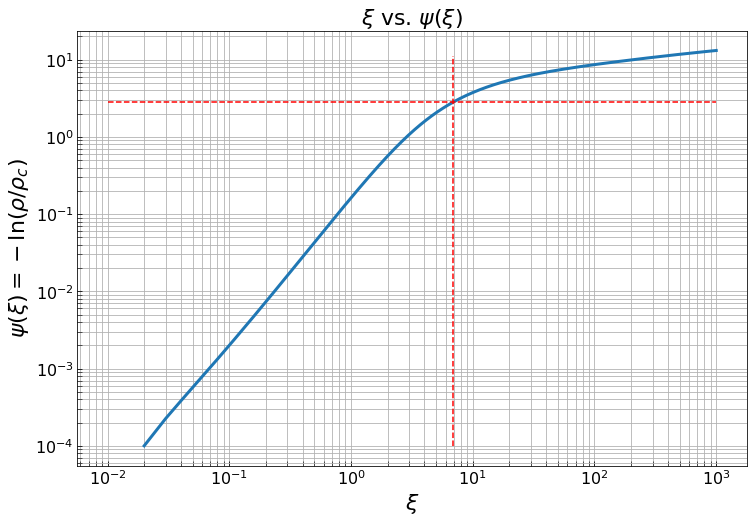

In [4]:
# Plot of \xi vs. \psi.

plt.figure(figsize=(12, 8))
plt.plot(xi_sol, psi_sol, linewidth=3)
plt.hlines(2.808, 0.01, 1e3, color='r', linestyle='dashed')
plt.vlines(6.900, 1e-4, 1.1e1, color='r', linestyle='dashed')

plt.xlabel(r'$\xi$', fontsize=22)
plt.ylabel(r'$\psi(\xi) = - \ln (\rho / \rho_c)$', fontsize=22)
plt.title(r'$\xi$ vs. $\psi(\xi)$', fontsize=22)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax = plt.gca()
ax.tick_params(which='both', length=5, direction='in')

plt.grid('True', which='both')
plt.show()

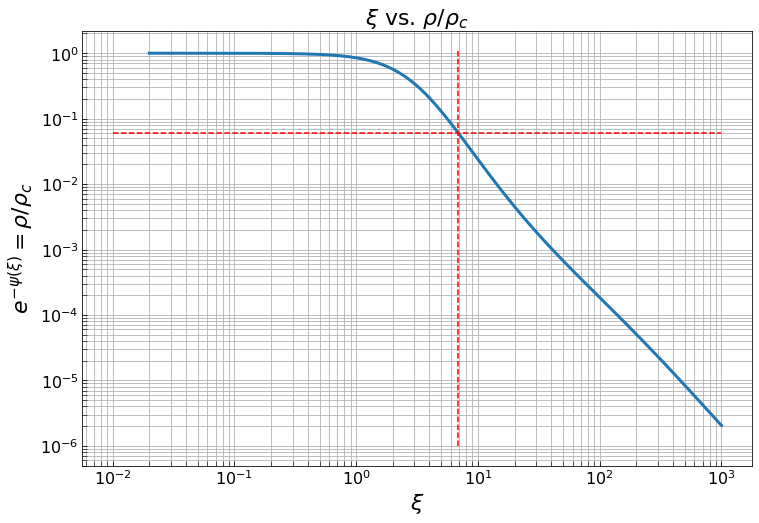

In [5]:
# Plot of \xi vs. \rho/\rho_c.

plt.figure(figsize=(12, 8))
plt.plot(xi_sol, np.exp(-np.asarray(psi_sol)), linewidth=3, label=r'$e^{-\psi}$')
plt.hlines(6.030e-02, 0.01, 1e3, color='r', linestyle='dashed')
plt.vlines(6.900, 1e-6, 1.1e0, color='r', linestyle='dashed')

plt.xlabel(r'$\xi$', fontsize=22)
plt.ylabel(r'$e^{-\psi(\xi)} = \rho / \rho_c$', fontsize=22)
plt.title(r'$\xi$ vs. $\rho/\rho_c$', fontsize=22)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax = plt.gca()
ax.tick_params(which='both', length=5, direction='in')

plt.grid('True', which='both')
plt.show()